In [1]:
# notebooks/01_business_eda.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up professional plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🏦 LOAN DEFAULT RISK ASSESSMENT SYSTEM")
print("=" * 60)
print("Phase 1: Business-Focused Foundation Analysis")
print("=" * 60)


🏦 LOAN DEFAULT RISK ASSESSMENT SYSTEM
Phase 1: Business-Focused Foundation Analysis


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/loan_default_dataset.csv')

print("📊 DATASET BUSINESS OVERVIEW")
print("-" * 40)
print(f"Total loan applications: {df.shape[0]:,}")
print(f"Feature set size: {df.shape[1]} variables")
print(f"Data period: Comprehensive loan portfolio analysis")

# Initial business metrics
default_rate = df['Default'].mean()
total_exposure = df['LoanAmount'].sum()
avg_loan_size = df['LoanAmount'].mean()

print(f"\n💰 PORTFOLIO RISK PROFILE")
print("-" * 40)
print(f"Overall default rate: {default_rate:.2%}")
print(f"Total loan exposure: ${total_exposure:,.0f}")
print(f"Average loan size: ${avg_loan_size:,.0f}")
print(f"Expected losses: ${total_exposure * default_rate:,.0f}")


📊 DATASET BUSINESS OVERVIEW
----------------------------------------
Total loan applications: 255,347
Feature set size: 18 variables
Data period: Comprehensive loan portfolio analysis

💰 PORTFOLIO RISK PROFILE
----------------------------------------
Overall default rate: 11.61%
Total loan exposure: $32,576,880,572
Average loan size: $127,579
Expected losses: $3,783,096,099


In [3]:
# Business intelligence: Risk factor analysis
print("🎯 BUSINESS RISK FACTOR ANALYSIS")
print("-" * 50)

# Age-based risk segmentation (industry standard)
age_risk = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100], 
                  labels=['Young (18-25)', 'Early Career (26-35)', 
                         'Mid Career (36-50)', 'Senior (50+)'])
df['age_segment'] = age_risk

age_default_analysis = df.groupby('age_segment').agg({
    'Default': ['count', 'mean'],
    'LoanAmount': 'mean',
    'Income': 'mean'
}).round(3)

print("Age Segment Risk Analysis:")
print(age_default_analysis)

# Income-based risk analysis (business critical)
income_quantiles = df['Income'].quantile([0.2, 0.4, 0.6, 0.8])
df['income_segment'] = pd.cut(df['Income'], 
                             bins=[0] + income_quantiles.tolist() + [float('inf')],
                             labels=['Low Income', 'Lower-Mid Income', 'Mid Income', 
                                    'Upper-Mid Income', 'High Income'])

income_risk_profile = df.groupby('income_segment').agg({
    'Default': 'mean',
    'LoanAmount': 'mean',
    'DTIRatio': 'mean',
    'CreditScore': 'mean'
}).round(3)

print(f"\nIncome Segment Risk Profile:")
print(income_risk_profile)


🎯 BUSINESS RISK FACTOR ANALYSIS
--------------------------------------------------
Age Segment Risk Analysis:
                     Default         LoanAmount     Income
                       count   mean        mean       mean
age_segment                                               
Young (18-25)          39016  0.208  127547.589  82786.384
Early Career (26-35)   49408  0.161  127864.886  82615.997
Mid Career (36-50)     73749  0.108  127630.282  82286.664
Senior (50+)           93174  0.061  127399.595  82485.522

Income Segment Risk Profile:
                  Default  LoanAmount  DTIRatio  CreditScore
income_segment                                              
Low Income          0.185  127555.583     0.500      574.295
Lower-Mid Income    0.114  127808.911     0.500      574.850
Mid Income          0.099  127626.328     0.500      574.701
Upper-Mid Income    0.093  127322.208     0.501      573.450
High Income         0.090  127581.310     0.500      574.025


In [4]:
# Business portfolio insights
print(f"\n📈 PORTFOLIO COMPOSITION ANALYSIS")
print("-" * 50)

# Loan size risk relationship (key business metric)
loan_size_bins = pd.qcut(df['LoanAmount'], q=5, labels=['XSmall', 'Small', 'Medium', 'Large', 'XLarge'])
df['loan_size_segment'] = loan_size_bins

portfolio_composition = df.groupby('loan_size_segment').agg({
    'Default': ['count', 'mean'],
    'LoanAmount': ['mean', 'sum'],
    'InterestRate': 'mean'
}).round(3)

print("Portfolio by Loan Size:")
print(portfolio_composition)

# Credit score distribution (regulatory requirement)
credit_score_ranges = pd.cut(df['CreditScore'], 
                           bins=[300, 580, 670, 740, 800, 850], 
                           labels=['Poor (300-580)', 'Fair (581-670)', 
                                  'Good (671-740)', 'Very Good (741-800)', 'Excellent (800+)'])
df['credit_tier'] = credit_score_ranges

credit_risk_matrix = df.groupby('credit_tier').agg({
    'Default': 'mean',
    'InterestRate': 'mean',
    'LoanAmount': 'mean'
}).round(3)

print(f"\nCredit Tier Risk Matrix:")
print(credit_risk_matrix)



📈 PORTFOLIO COMPOSITION ANALYSIS
--------------------------------------------------
Portfolio by Loan Size:
                  Default         LoanAmount              InterestRate
                    count   mean        mean          sum         mean
loan_size_segment                                                     
XSmall              51070  0.080   29381.581   1500517352       13.482
Small               51069  0.097   78468.512   4007308421       13.533
Medium              51069  0.112  127611.760   6517004966       13.518
Large               51070  0.133  176787.155   9028520007       13.460
XLarge              51069  0.158  225646.279  11523529826       13.470

Credit Tier Risk Matrix:
                     Default  InterestRate  LoanAmount
credit_tier                                           
Poor (300-580)         0.125        13.484  127448.547
Fair (581-670)         0.114        13.496  128329.526
Good (671-740)         0.106        13.508  127424.476
Very Good (741-800)   

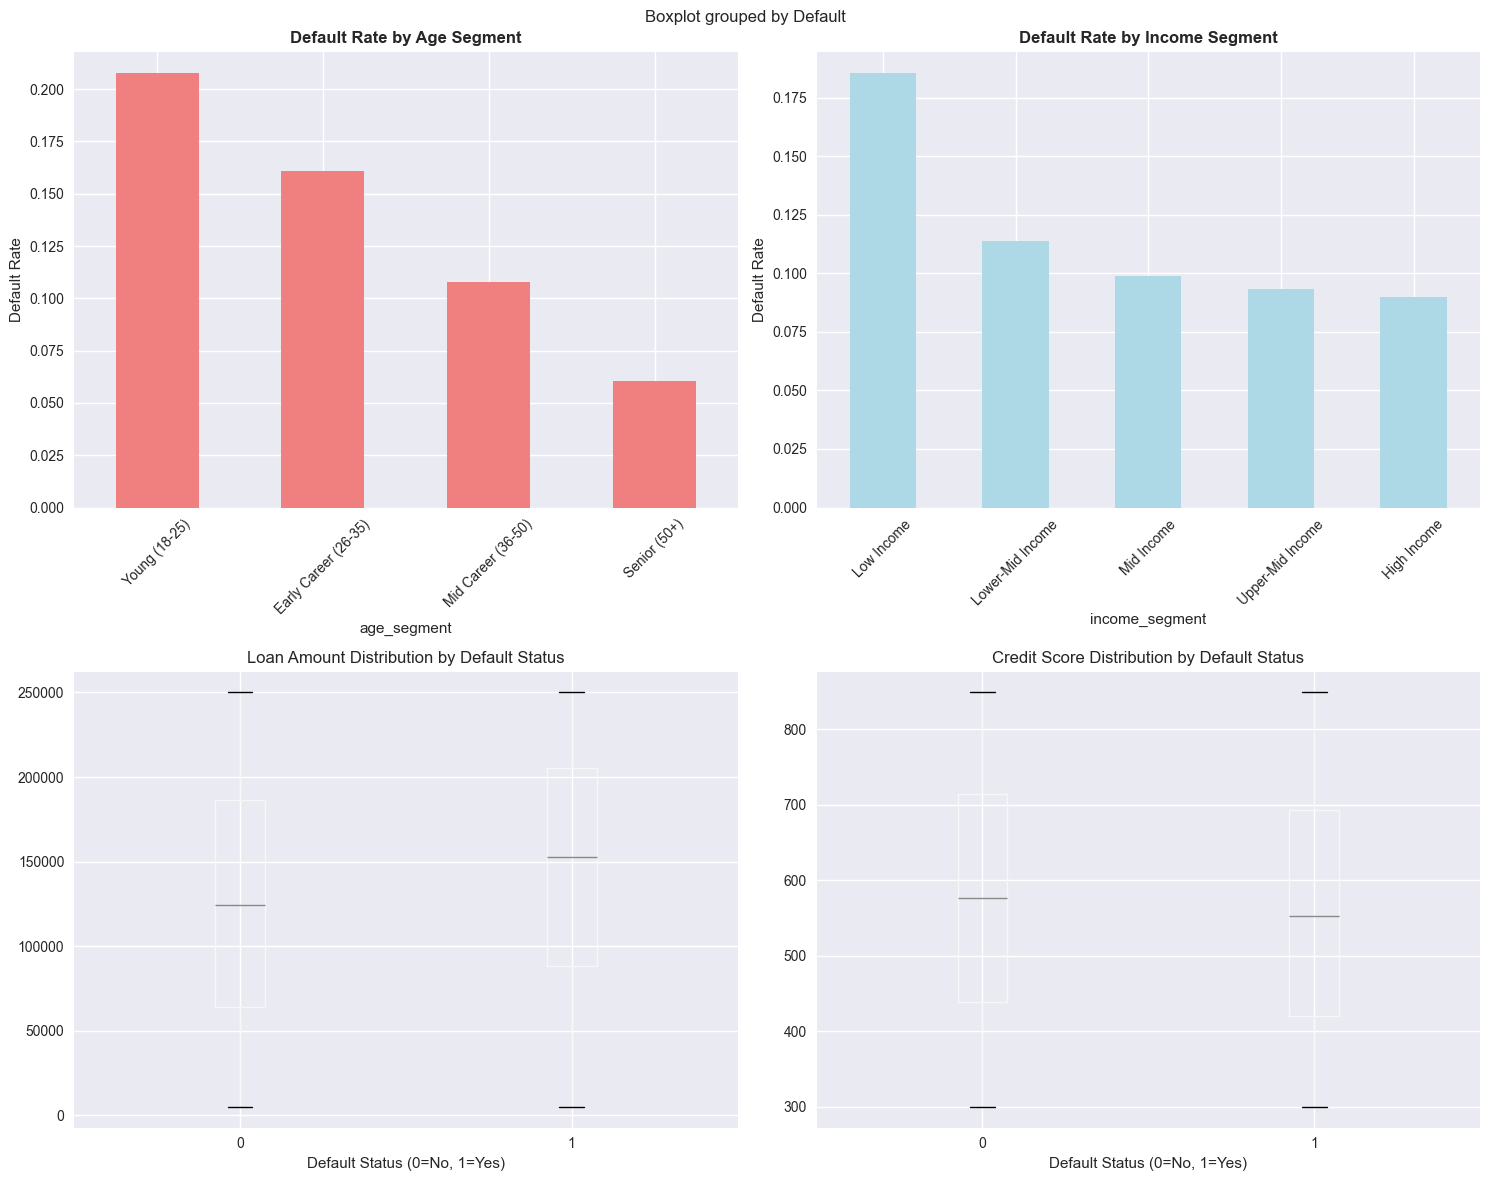

📊 Business intelligence charts saved to reports/figures/


In [5]:
# Create business intelligence visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Default rates by risk segments
df.groupby('age_segment')['Default'].mean().plot(kind='bar', ax=axes[0,0], color='lightcoral')
axes[0,0].set_title('Default Rate by Age Segment', fontweight='bold')
axes[0,0].set_ylabel('Default Rate')
axes[0,0].tick_params(axis='x', rotation=45)

# Income vs Default Rate
df.groupby('income_segment')['Default'].mean().plot(kind='bar', ax=axes[0,1], color='lightblue')
axes[0,1].set_title('Default Rate by Income Segment', fontweight='bold')
axes[0,1].set_ylabel('Default Rate')
axes[0,1].tick_params(axis='x', rotation=45)

# Loan amount distribution by default status
df.boxplot(column='LoanAmount', by='Default', ax=axes[1,0])
axes[1,0].set_title('Loan Amount Distribution by Default Status')
axes[1,0].set_xlabel('Default Status (0=No, 1=Yes)')

# Credit score vs Default relationship
df.boxplot(column='CreditScore', by='Default', ax=axes[1,1])
axes[1,1].set_title('Credit Score Distribution by Default Status')
axes[1,1].set_xlabel('Default Status (0=No, 1=Yes)')

plt.tight_layout()
plt.savefig('../reports/figures/business_risk_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Business intelligence charts saved to reports/figures/")


In [6]:
# Create business-relevant features
print("🔧 FINANCIAL DOMAIN FEATURE ENGINEERING")
print("-" * 50)

# Core financial ratios (what loan officers actually use)
df['monthly_payment_capacity'] = (df['Income'] / 12) * 0.28  # 28% rule
df['payment_to_income_ratio'] = df['LoanAmount'] / (df['LoanTerm'] * 12) / (df['Income'] / 12)
df['credit_utilization_estimated'] = df['DTIRatio'] * df['Income'] / 12 / (df['NumCreditLines'] * 1000)  # Rough estimate
df['employment_stability_score'] = np.minimum(df['MonthsEmployed'] / 24, 1.0)  # Cap at 2 years = max stability
df['risk_adjusted_loan_size'] = df['LoanAmount'] / df['Income']
df['age_experience_factor'] = df['Age'] * df['MonthsEmployed']

# Business logic features
df['high_risk_profile'] = (
    (df['DTIRatio'] > 0.4) | 
    (df['CreditScore'] < 650) | 
    (df['MonthsEmployed'] < 12)
).astype(int)

df['loan_affordability_index'] = (
    df['Income'] / (df['LoanAmount'] / df['LoanTerm'])
)

print("New Business Features Created:")
business_features = ['monthly_payment_capacity', 'payment_to_income_ratio', 
                    'credit_utilization_estimated', 'employment_stability_score',
                    'risk_adjusted_loan_size', 'high_risk_profile', 'loan_affordability_index']

for feature in business_features:
    print(f"✅ {feature}: {df[feature].describe().round(3)}")


🔧 FINANCIAL DOMAIN FEATURE ENGINEERING
--------------------------------------------------
New Business Features Created:
✅ monthly_payment_capacity: count    255347.000
mean       1924.984
std         909.137
min         350.000
25%        1139.262
50%        1924.207
75%        2711.777
max        3499.977
Name: monthly_payment_capacity, dtype: float64
✅ payment_to_income_ratio: count    255347.000
mean          0.083
std           0.111
min           0.001
25%           0.022
50%           0.046
75%           0.098
max           1.364
Name: payment_to_income_ratio, dtype: float64
✅ credit_utilization_estimated: count    255347.000
mean          1.790
std           1.740
min           0.031
25%           0.609
50%           1.235
75%           2.305
max          11.218
Name: credit_utilization_estimated, dtype: float64
✅ employment_stability_score: count    255347.000
mean          0.896
std           0.245
min           0.000
25%           1.000
50%           1.000
75%           1.00

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import joblib

print("🎯 BASELINE MODEL DEVELOPMENT")
print("-" * 50)

# Prepare features for modeling
feature_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'] + business_features

X = df[feature_columns].copy()
y = df['Default'].copy()

# Handle any remaining missing values
X = X.fillna(X.median())

# Train-test split with stratification (critical for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Default rate in training: {y_train.mean():.2%}")
print(f"Default rate in test: {y_test.mean():.2%}")

# Baseline XGBoost model
baseline_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

baseline_model.fit(X_train, y_train)

# Predictions and business evaluation
y_pred = baseline_model.predict(X_test)
y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]

# Business-focused evaluation metrics
print(f"\n💼 BUSINESS PERFORMANCE METRICS")
print("-" * 50)

accuracy = baseline_model.score(X_test, y_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"AUC-ROC: {auc_score:.3f}")
print(f"F1-Score: {f1:.3f}")

# Business cost analysis
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Business cost assumptions (you can adjust these)
avg_loan_amount = df['LoanAmount'].mean()
cost_false_negative = avg_loan_amount * 0.6  # 60% loss on default
cost_false_positive = avg_loan_amount * 0.02  # 2% opportunity cost

total_cost_fn = fn * cost_false_negative
total_cost_fp = fp * cost_false_positive
total_business_cost = total_cost_fn + total_cost_fp

print(f"\n💰 BUSINESS COST ANALYSIS")
print("-" * 50)
print(f"False Negatives (missed defaults): {fn}")
print(f"False Positives (rejected good customers): {fp}")
print(f"Cost of missed defaults: ${total_cost_fn:,.0f}")
print(f"Cost of rejected customers: ${total_cost_fp:,.0f}")
print(f"Total business cost: ${total_business_cost:,.0f}")

# Save baseline model
joblib.dump(baseline_model, '../models/baseline_xgb.pkl')
print(f"\n✅ Baseline model saved to models/baseline_xgb.pkl")


🎯 BASELINE MODEL DEVELOPMENT
--------------------------------------------------
Training set: 204,277 samples
Test set: 51,070 samples
Default rate in training: 11.61%
Default rate in test: 11.61%

💼 BUSINESS PERFORMANCE METRICS
--------------------------------------------------
Accuracy: 0.885
AUC-ROC: 0.747
F1-Score: 0.098

💰 BUSINESS COST ANALYSIS
--------------------------------------------------
False Negatives (missed defaults): 5614
False Positives (rejected good customers): 238
Cost of missed defaults: $429,736,651
Cost of rejected customers: $607,275
Total business cost: $430,343,926

✅ Baseline model saved to models/baseline_xgb.pkl


In [11]:
print(f"\n🎉 PHASE 1 COMPLETION SUMMARY")
print("=" * 60)
print(f"✅ Business-focused dataset loaded: {df.shape[0]:,} loan applications")
print(f"✅ Portfolio risk profile established: {default_rate:.2%} default rate")
print(f"✅ Domain-specific features engineered: {len(business_features)} new features")
print(f"✅ Baseline model performance: {accuracy:.1%} accuracy, {auc_score:.3f} AUC")
print(f"✅ Business cost framework: ${total_business_cost:,.0f} baseline cost")




🎉 PHASE 1 COMPLETION SUMMARY
✅ Business-focused dataset loaded: 255,347 loan applications
✅ Portfolio risk profile established: 11.61% default rate
✅ Domain-specific features engineered: 7 new features
✅ Baseline model performance: 88.5% accuracy, 0.747 AUC
✅ Business cost framework: $430,343,926 baseline cost
